# Crypto Projecr II
## Bitcoin Next Day Closing Price Predictor
### Machine learning(Supervised Learning classification)
### Models: Random forest Regressor, Linear Regression
#### About Dataset
Context
Things like Block chain, Bitcoin, Bitcoin cash, Ethereum, Ripple etc are constantly coming in the news articles I read. So I wanted to understand more about it and this post helped me get started. Once the basics are done, the data scientist inside me started raising questions like:

How many cryptocurrencies are there and what are their prices and valuations?
Why is there a sudden surge in the interest in recent days?
So what next?
Now that we have the price data, I wanted to dig a little more about the factors affecting the price of coins. I started of with Bitcoin and there are quite a few parameters which affect the price of Bitcoin. Thanks to Blockchain Info, I was able to get quite a few parameters on once in two day basis.

This will help understand the other factors related to Bitcoin price and also help one make future predictions in a better way than just using the historical price.

* Content
The dataset has one csv file for each currency. Price history is available on a daily basis from April 28, 2013. This dataset has the historical price information of some of the top crypto currencies by market capitalization.

* Date : date of observation
* Open : Opening price on the given day
* High : Highest price on the given day
* Low : Lowest price on the given day
* Close : Closing price on the given day
* Volume : Volume of transactions on the given day
* Market Cap : Market capitalization in USD
* Acknowledgements
* This data is taken from coinmarketcap and it is free to use the data.

Cover Image : Photo by Thomas Malama on Unsplash

* Inspiration.
Some of the questions which could be inferred from this dataset are:

How did the historical prices / market capitalizations of various currencies change over time?

Predicting the future price of the currencies

Which currencies are more volatile and which ones are more stable?

How does the price fluctuations of currencies correlate with each other?

Seasonal trend in the price fluctuations

[7]: https://blockchain.info/

## Data processing

In [181]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

# loading data 
df = pd.read_csv("coin_Bitcoin.csv")
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [182]:
# checking for missing values 
df.isna().sum()

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [183]:
df.dtypes

SNo            int64
Name          object
Symbol        object
Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
dtype: object

In [184]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SNo,2991.0,1.496000e+03,8.635717e+02,1.000000e+00,7.485000e+02,1.496000e+03,2.243500e+03,2.991000e+03
High,2991.0,6.893326e+03,1.164283e+04,7.456110e+01,4.361790e+02,2.387610e+03,8.733927e+03,6.486310e+04
Low,2991.0,6.486010e+03,1.086903e+04,6.552600e+01,4.228795e+02,2.178500e+03,8.289800e+03,6.220896e+04
Open,2991.0,6.700146e+03,1.128804e+04,6.850500e+01,4.304455e+02,2.269890e+03,8.569656e+03,6.352375e+04
Close,2991.0,6.711290e+03,1.129814e+04,6.843100e+01,4.305695e+02,2.286410e+03,8.576239e+03,6.350346e+04
Volume,2991.0,1.090633e+10,1.888895e+10,0.000000e+00,3.036725e+07,9.460360e+08,1.592015e+10,3.509679e+11
Marketcap,2991.0,1.208761e+11,2.109438e+11,7.784112e+08,6.305579e+09,3.741503e+10,1.499957e+11,1.186364e+12


In [185]:
df.index  = pd.to_datetime(df["Date"])
df.index

DatetimeIndex(['2013-04-29 23:59:59', '2013-04-30 23:59:59',
               '2013-05-01 23:59:59', '2013-05-02 23:59:59',
               '2013-05-03 23:59:59', '2013-05-04 23:59:59',
               '2013-05-05 23:59:59', '2013-05-06 23:59:59',
               '2013-05-07 23:59:59', '2013-05-08 23:59:59',
               ...
               '2021-06-27 23:59:59', '2021-06-28 23:59:59',
               '2021-06-29 23:59:59', '2021-06-30 23:59:59',
               '2021-07-01 23:59:59', '2021-07-02 23:59:59',
               '2021-07-03 23:59:59', '2021-07-04 23:59:59',
               '2021-07-05 23:59:59', '2021-07-06 23:59:59'],
              dtype='datetime64[ns]', name='Date', length=2991, freq=None)

In [186]:
filtered_df = df.drop(['SNo', 'Name', 'Symbol','Date'], axis=1)
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2991 entries, 2013-04-29 23:59:59 to 2021-07-06 23:59:59
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2991 non-null   float64
 1   Low        2991 non-null   float64
 2   Open       2991 non-null   float64
 3   Close      2991 non-null   float64
 4   Volume     2991 non-null   float64
 5   Marketcap  2991 non-null   float64
dtypes: float64(6)
memory usage: 163.6 KB


In [187]:
df.index.min(), df.index.max()

(Timestamp('2013-04-29 23:59:59'), Timestamp('2021-07-06 23:59:59'))

## Feature Selection/ EDA

In [188]:
filtered_df[[ "Marketcap"]] = filtered_df[[ "Marketcap"]].astype(float)
filtered_df.head()

,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,
2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [205]:
from sklearn.ensemble import RandomForestRegressor
all_features = ['High', 'Low', 'Open', 'Close', 'Marketcap', "Volume"]


# assingning feture and target variables
x = filtered_df[all_features].fillna(0)
# Removing the last row since it wont be import for trainin as it predicts for the next day 
x = x.iloc[:-1]

y = filtered_df['Close'].shift(-1)
y = y.iloc[:-1]

In [206]:
model = RandomForestRegressor()
model.fit(x,y)
feature_importance = model.feature_importances_
indices = np.argsort(feature_importance)[::-1]

In [207]:
print("Feature ranking:")
for f in range(x.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, all_features[indices[f]], feature_importance[indices[f]]))

Feature ranking:
1. feature High (0.283747)
2. feature Close (0.234614)
3. feature Low (0.206473)
4. feature Marketcap (0.169363)
5. feature Open (0.105312)
6. feature Volume (0.000491)


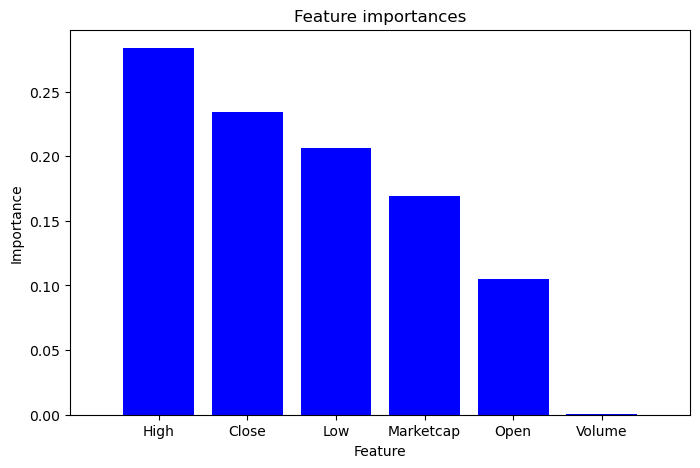

In [208]:
# Plotting Feature importance
plt.figure(figsize=(8,5))
plt.title("Feature importances")
plt.bar(range(x.shape[1]), feature_importance[indices], color="b", align="center")
plt.xticks(range(x.shape[1]), [all_features[i] for i in indices])
plt.xlim([-1, x.shape[1]])
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.show()

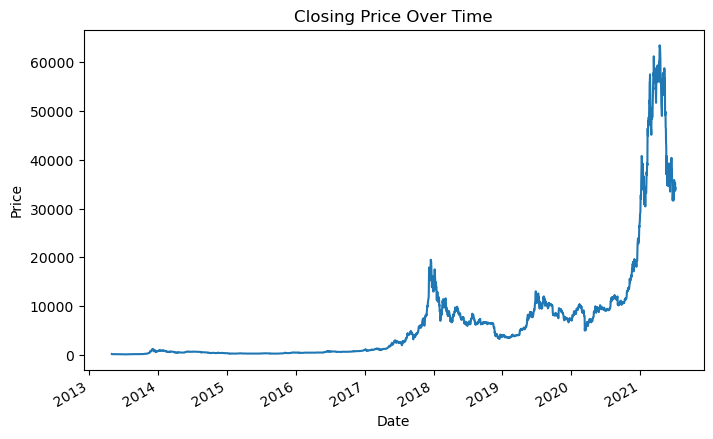

In [209]:
# Plotting For Closing Price over Time 
filtered_df['Close'].plot(figsize=(8, 5))
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

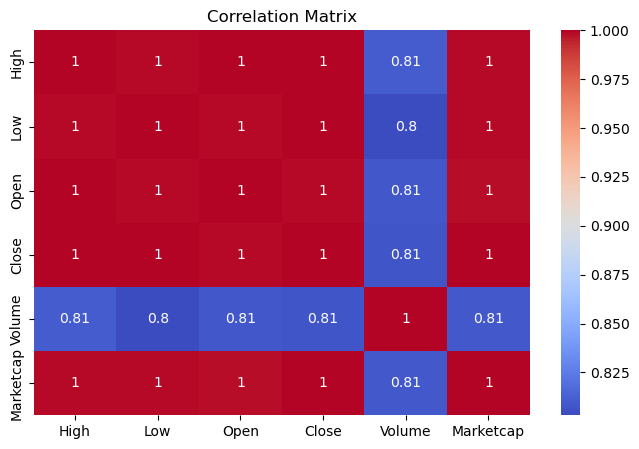

In [210]:

corr_matrix = filtered_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

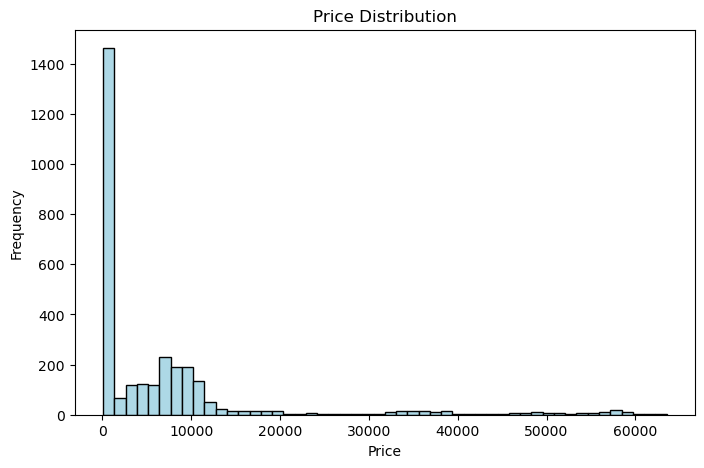

In [211]:
# Plotting price Distribution 
plt.figure(figsize=(8,5))
plt.hist(filtered_df['Close'], bins=50,color= "lightblue", edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

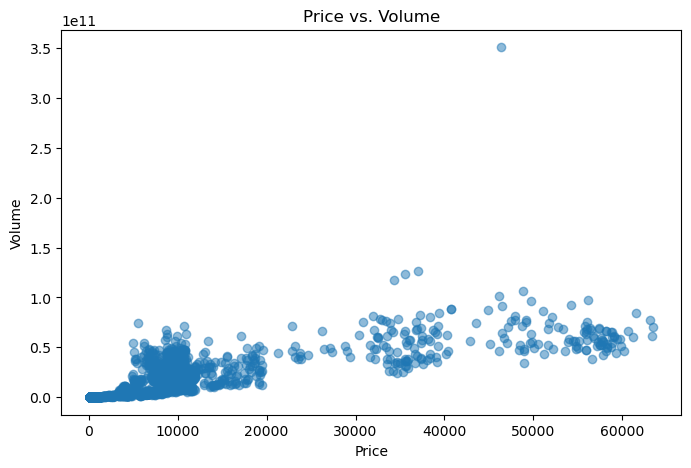

In [212]:
# Plotting Price Againt Volume 
plt.figure(figsize=(8,5))
plt.scatter(filtered_df['Close'], df['Volume'], alpha=0.5)
plt.title('Price vs. Volume')
plt.xlabel('Price')
plt.ylabel('Volume')
plt.show()

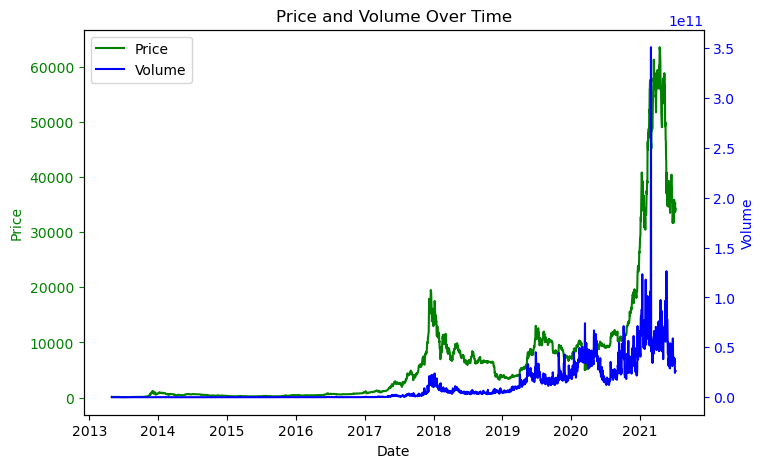

In [213]:
fig, ax1 = plt.subplots(figsize=(8,5))


ax1.plot(filtered_df['Close'], color='g', label='Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price', color='g')
ax1.tick_params('y', colors='g')


ax2 = ax1.twinx()
ax2.plot(df['Volume'], color='b', label='Volume')
ax2.set_ylabel('Volume', color='b')
ax2.tick_params('y', colors='b')


lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Price and Volume Over Time')
plt.show()

## Modeling

In [214]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model  import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

# split data to train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2 )

In [215]:
# Scaling our data 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [216]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

## Model Selction\Evaluation

In [217]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    return mse, r2, mae, evs

In [218]:
results = {}
for model_name, model in models.items():
    mse, r2, mae, evs = evaluate_model(model, x_train, y_train, x_test, y_test)
    results[model_name] = {'MSE': mse, 'R^2': r2, 'MAE': mae, 'Explained Variance Score': evs}

In [219]:
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {metrics['MSE']}")
    print(f"R^2 Score: {metrics['R^2']}")
    print(f"Mean Absolute Error: {metrics['MAE']}")
    print(f"Explained Variance Score: {metrics['Explained Variance Score']}")
    print("-" * 30)

Model: Linear Regression
Mean Squared Error: 283898.1395816208
R^2 Score: 0.9971219185469129
Mean Absolute Error: 197.05603225423602
Explained Variance Score: 0.9971245177808593
------------------------------
Model: Random Forest
Mean Squared Error: 336104.0811016765
R^2 Score: 0.9965926690342135
Mean Absolute Error: 218.64476600991478
Explained Variance Score: 0.9965946190860986
------------------------------


In [220]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', LinearRegression())
])

In [221]:
from sklearn.linear_model import LinearRegression
rf_model = LinearRegression()
rf_model.fit(x_train, y_train)
pred = rf_model.predict(x_test)
r2_score(pred, y_test)

0.9971147231183107

In [222]:
import joblib

joblib.dump(rf_model, "bitcoin_predictor.pkl")

['bitcoin_predictor.pkl']

In [223]:
loaded_model = joblib.load('bitcoin_predictor.pkl')
l_pred = rf_model.predict(x_test)

mse = mean_squared_error(y_test, l_pred)
r2 = r2_score(y_test, l_pred)
mae = mean_absolute_error(y_test, l_pred)
evs = explained_variance_score(y_test, l_pred)

In [224]:
print("\nEvaluation Metrics on Test Set:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Explained Variance Score: {evs}")


Evaluation Metrics on Test Set:
Mean Squared Error: 283898.1395816208
R^2 Score: 0.9971219185469129
Mean Absolute Error: 197.05603225423602
Explained Variance Score: 0.9971245177808593


In [225]:
filtered_df.iloc[-3:-1]

,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,
2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


In [227]:
pr = rf_model.predict([[35937.567147, 34396.477458, 34665.564866, 35287.779766, 2.492431e+10, 6.615748e+11]])
pr

c:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36679.87777611])

#### This conclude the experiment i have tried sevral models  and feature engineering mechnics but the highest i could get was an MAE of 197 which is okay but not as accurate as i expected. So now we deploy